In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import boto3 
import io
import os

In [13]:
import boto3
from io import BytesIO

from dotenv import load_dotenv

load_dotenv()  # Load environment variables from .env file
# initialize the S3 client
s3 = boto3.client('s3',
                  aws_access_key_id=os.getenv('aws_access_key_id'),
                  aws_secret_access_key=os.getenv('aws_secret_access_key'),
                  region_name='us-east-2')  # specify your region

# specify the bucket name and file key
bucket_name = 'dw-health-lifestyle-dataset'
file_key = 'health_lifestyle_dataset.csv'

try:
    # 2. Get the object from S3
    response = s3.get_object(Bucket=bucket_name, Key=file_key)
    
    # 3. Read the body of the response
    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")

    if status == 200:
        print(f"Successful S3 connection. Loading {file_key}...")
        # 4. Load into Pandas using BytesIO (acts like a file in memory)
        df = pd.read_csv(BytesIO(response['Body'].read()))
        print(df.head())
    else:
        print(f"Unsuccessful: {status}")

except Exception as e:
    print(f"Error: {e}")

Successful S3 connection. Loading health_lifestyle_dataset.csv...
   id  age  gender   bmi  daily_steps  sleep_hours  water_intake_l  \
0   1   56    Male  20.5         4198          3.9             3.4   
1   2   69  Female  33.3        14359          9.0             4.7   
2   3   46    Male  31.6         1817          6.6             4.2   
3   4   32  Female  38.2        15772          3.6             2.0   
4   5   60  Female  33.6         6037          3.8             4.0   

   calories_consumed  smoker  alcohol  resting_hr  systolic_bp  diastolic_bp  \
0               1602       0        0          97          161           111   
1               2346       0        1          68          116            65   
2               1643       0        1          90          123            99   
3               2460       0        0          71          165            95   
4               3756       0        1          98          139            61   

   cholesterol  family_history  

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

In [15]:
# check the missing values and basic statistics of the dataset
print(df.isnull().sum())
print(df.describe())

id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64
                  id            age            bmi   daily_steps  \
count  100000.000000  100000.000000  100000.000000  100000.00000   
mean    50000.500000      48.525990      29.024790   10479.87029   
std     28867.657797      17.886768       6.352666    5483.63236   
min         1.000000      18.000000      18.000000    1000.00000   
25%     25000.750000      33.000000      23.500000    5729.00000   
50%     50000.500000      48.000000      29.000000   10468.00000   
75%     75000.250000      64.000000      34.500000   15229.00000   
max    100000.000000      79.000000      40.000000   19999.00000   

      

In [33]:
# a function to plot the distribution of a column
def plot_distribution(column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# a function to plot the correlation heatmap
def plot_correlation_heatmap(data):
    data = data.select_dtypes(include=[np.number])  # Select only numeric columns
    plt.figure(figsize=(12, 10))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()  

# a function to plot the boxplot of a column
def plot_boxplot(column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()  

# a function to map a relation of disease_risk with other columns
def plot_disease_risk_relation(column):
    plt.figure(figsize=(10, 6))
    sns.pointplot(y=df['disease_risk'], x=df[column])
    plt.title(f'Relation of {column} with Disease Risk')
    plt.xlabel(column)
    plt.ylabel('Disease Risk')
    plt.show()

# a function to plot the count of a categorical column
def plot_categorical_count(column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column])
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()  

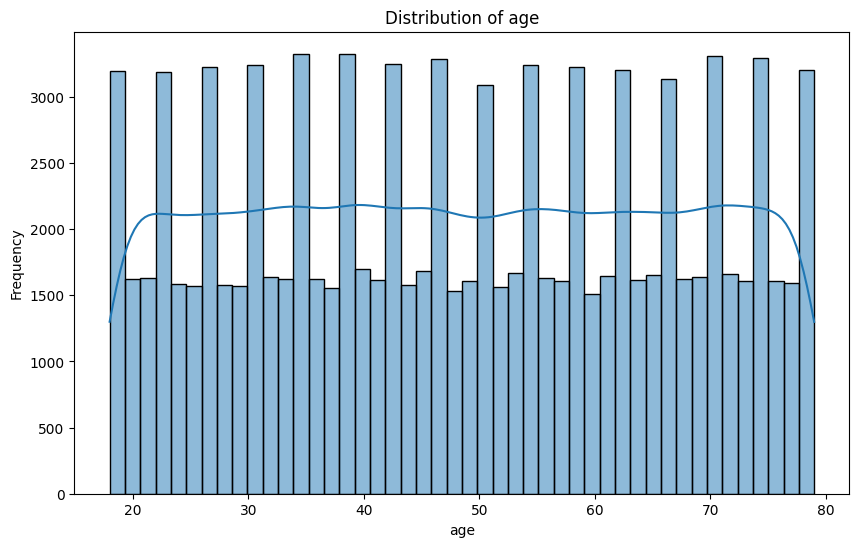

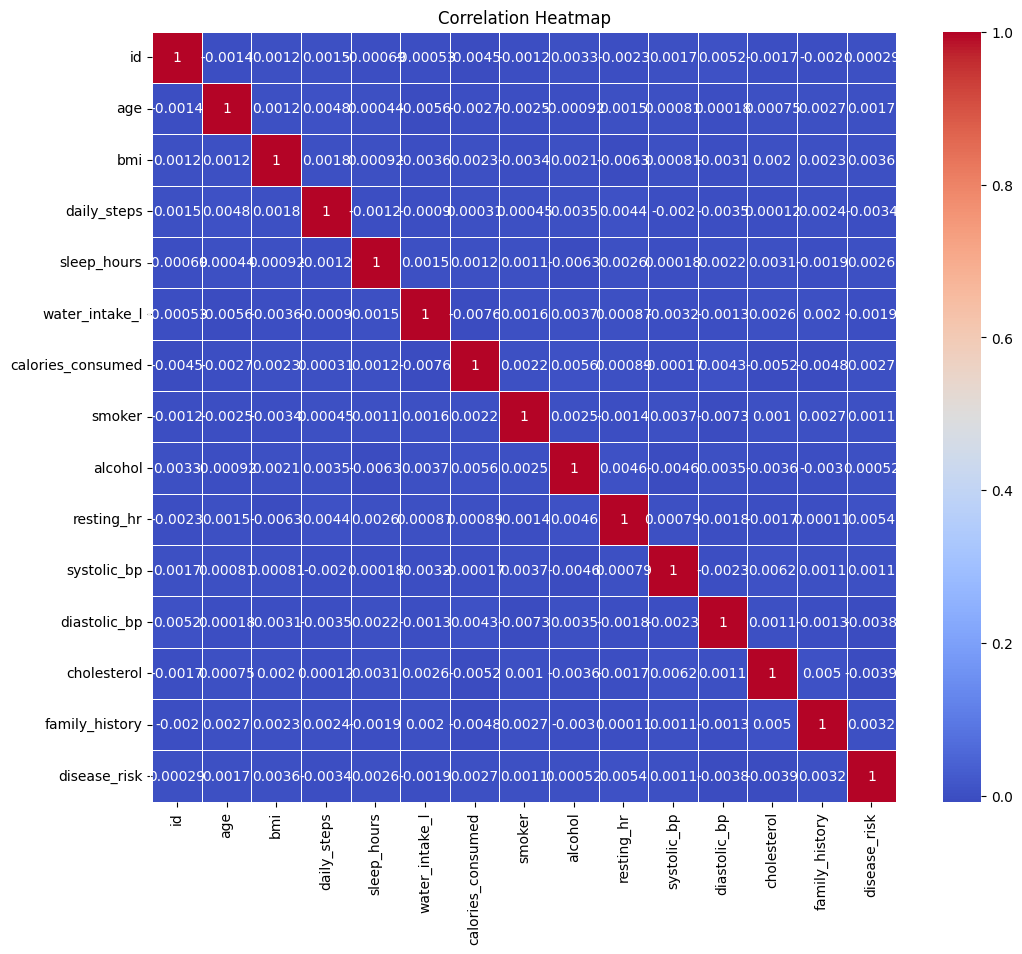

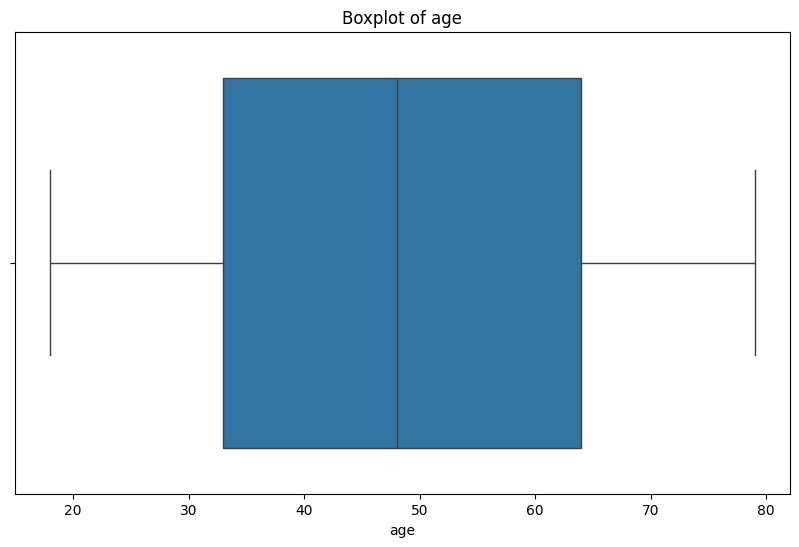

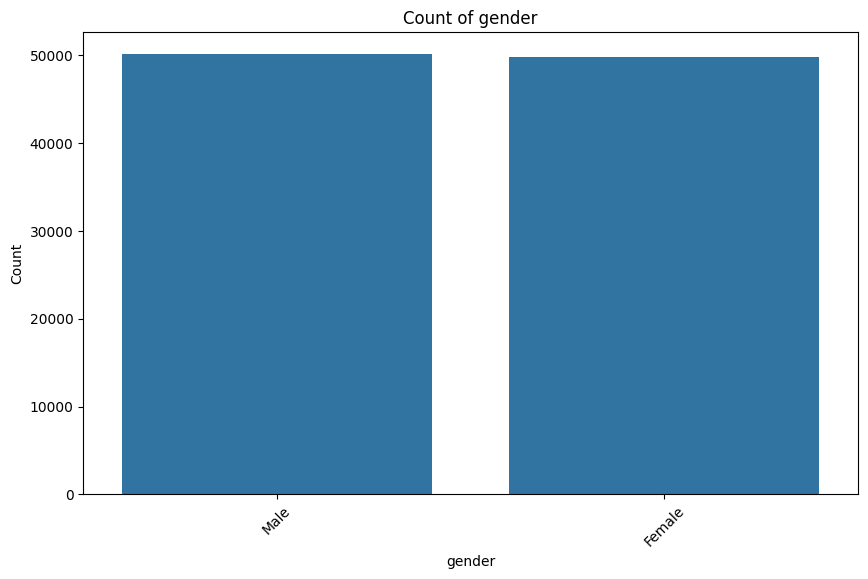

In [24]:
# call the functions to visualize the data
plot_distribution('age')
plot_correlation_heatmap(df)
plot_boxplot('age')
plot_categorical_count('gender')

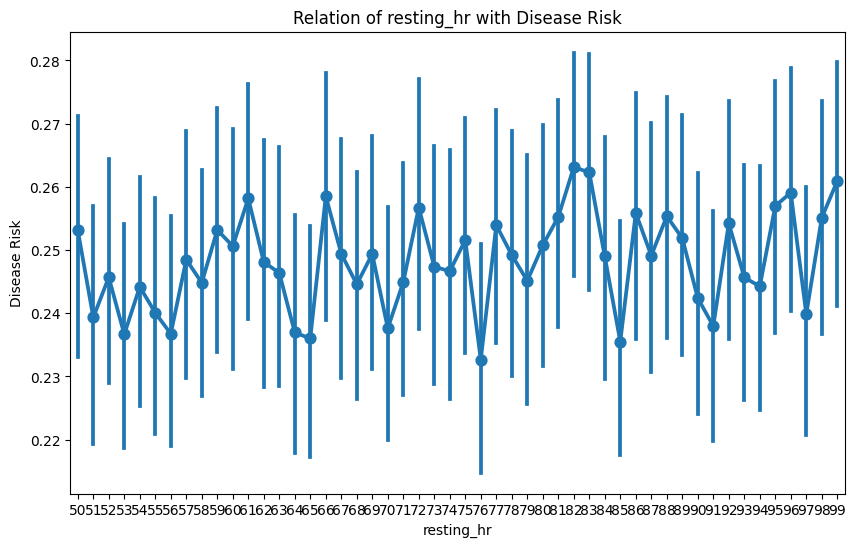

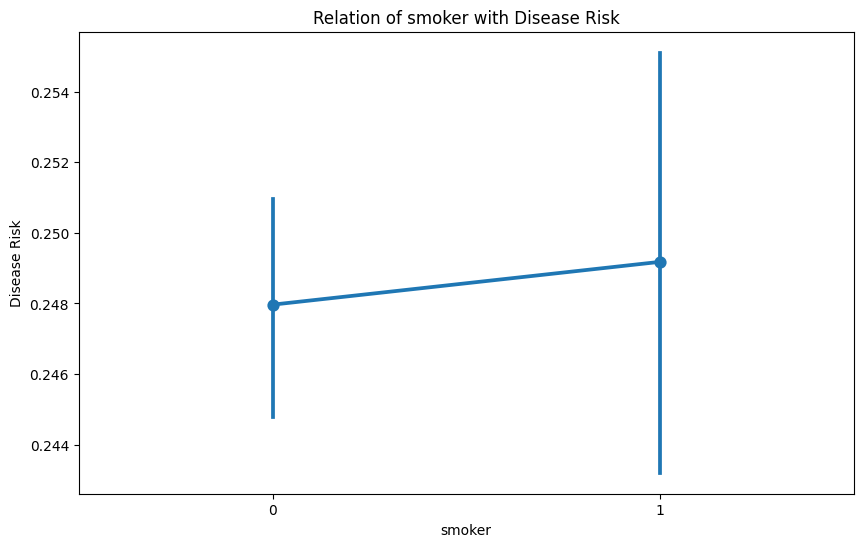

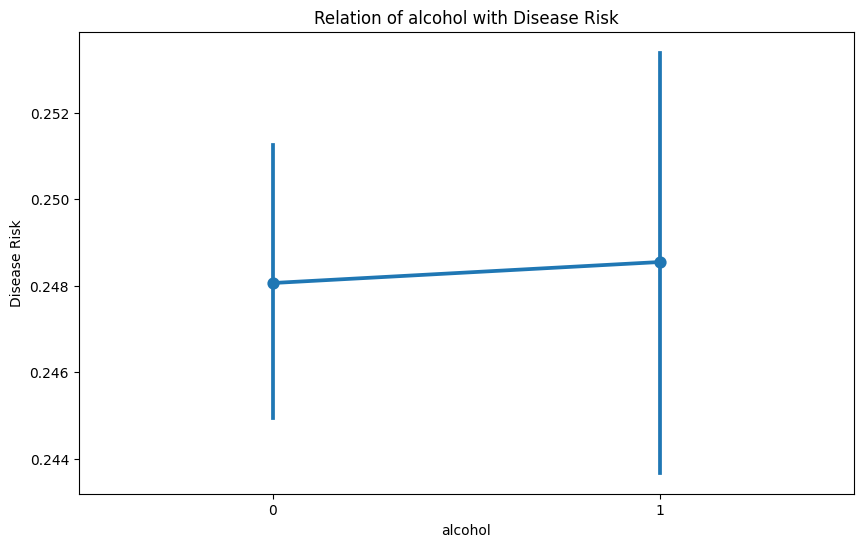

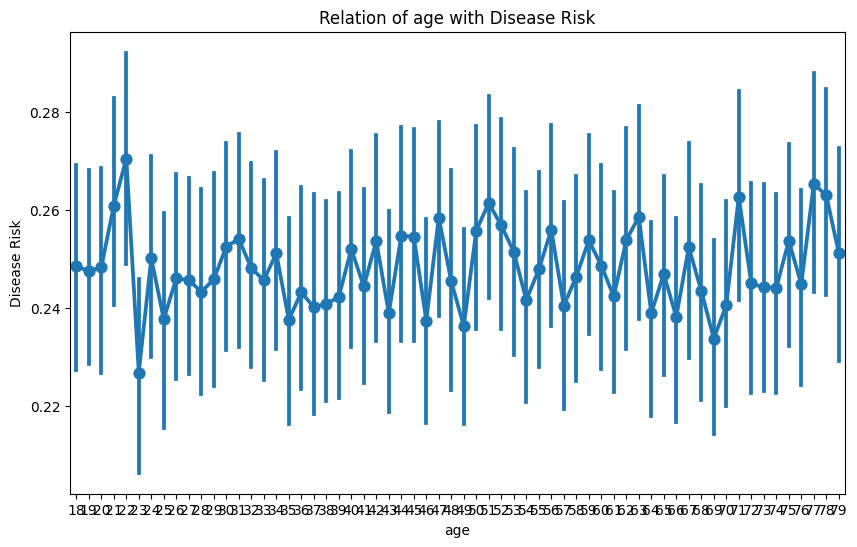

In [35]:
plot_disease_risk_relation('resting_hr')
plot_disease_risk_relation('smoker')
plot_disease_risk_relation('alcohol')
plot_disease_risk_relation('age')

In [39]:
initial_rows = len(df)
df = df.drop_duplicates()
print(f"Duplicates removed: {initial_rows - len(df)}")

# Check for missing values [cite: 31]
print("\nMissing Values Check:")
print(df.isnull().sum())

# ==========================================
# 2. Data Preparation Plan
# ==========================================

# 2.1 Feature Exclusion
# Drop 'ID' as it carries no predictive value [cite: 34]
if 'id' in df.columns:
    df = df.drop('id', axis=1)

Duplicates removed: 0

Missing Values Check:
id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64


In [40]:
df.describe()

,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,48.525990,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,17.886768,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,18.000000,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,33.000000,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,48.000000,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,64.000000,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000
max,79.000000,40.000000,19999.00000,10.000000,5.000000,3999.000000,1.000000,1.000000,99.000000,179.00000,119.000000,299.000000,1.000000,1.000000


In [ ]:
target = 'disease_risk'

# Define Continuous Features for Scaling [cite: 57, 59]
continuous_features = [
    'age', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 
    'calories_consumed', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'family_history'
]

# Define Categorical Features for Encoding 
categorical_features = ['gender']